In [1]:
import pandas as pd

# Upload the dataset using Colab's built-in function
from google.colab import files
uploaded = files.upload()


Saving train_loan_assmnt2.csv to train_loan_assmnt2.csv


In [2]:
train_df = pd.read_csv('train_loan_assmnt2.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(train_df.isna().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
numerical_cols = [col for col in train_df.columns
                    if (train_df[col].dtype == 'float64' or train_df[col].dtype == 'int64') and train_df[col].isnull().sum() > 0]
numerical_cols

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [5]:
skewness = train_df[numerical_cols].skew()
print(skewness)



LoanAmount          2.677552
Loan_Amount_Term   -2.362414
Credit_History     -1.882361
dtype: float64


In [6]:
for col in numerical_cols:
    if skewness[col] < -0.5 or skewness[col] > 0.5:
        # Use median for imputation
        train_df[col].fillna(train_df[col].median(), inplace=True)
    else:
        # Use mean for imputation
        train_df[col].fillna(train_df[col].mean(), inplace=True)
print(train_df.isna().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        mode_value = train_df[col].mode()[0]
        train_df[col].fillna(mode_value, inplace=True)
print(train_df.isna().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


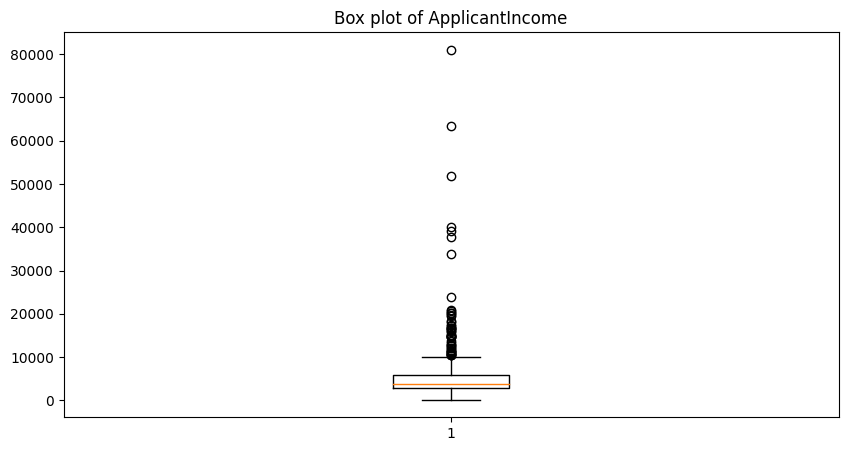

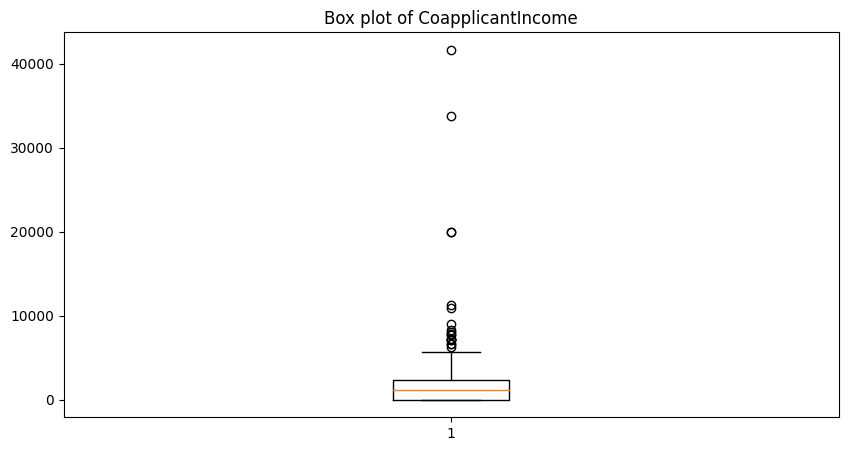

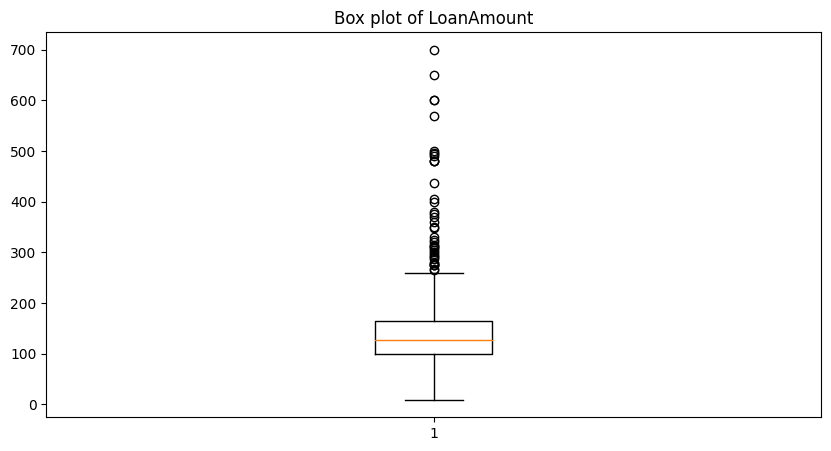

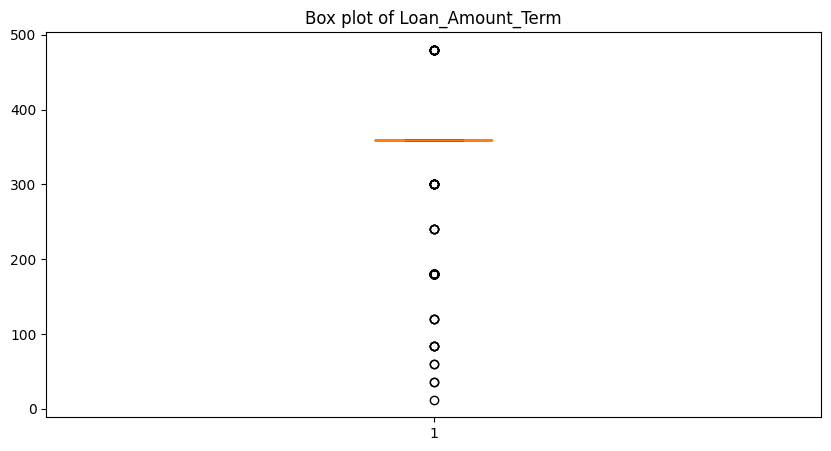

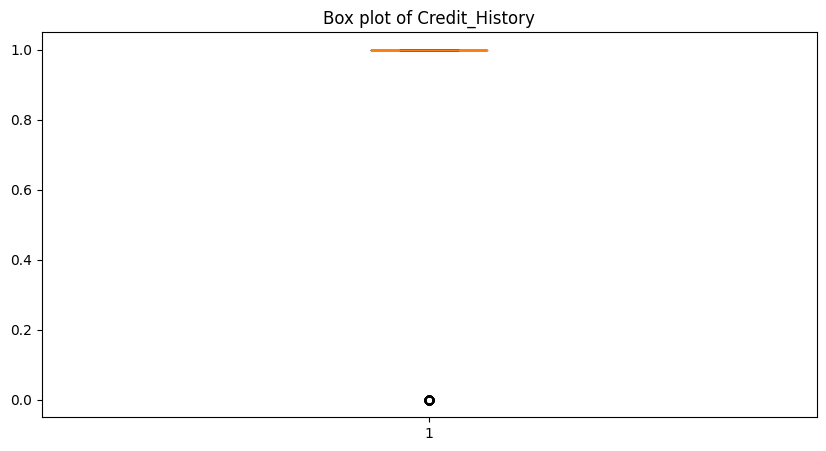

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = [col for col in train_df.columns if train_df[col].dtype == 'float64' or train_df[col].dtype == 'int64']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(x=train_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()



In [10]:
def outlier_percentage(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = (outliers.shape[0] / df.shape[0]) * 100
    return percentage

numerical_cols = [col for col in train_df.columns if train_df[col].dtype == 'float64' or train_df[col].dtype == 'int64']

outlier_percentages = {}
for col in numerical_cols:
    outlier_percentages[col] = outlier_percentage(train_df, col)

# Display the result
for col, percentage in outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")


ApplicantIncome: 8.14%
CoapplicantIncome: 2.93%
LoanAmount: 6.68%
Loan_Amount_Term: 14.33%
Credit_History: 14.50%


In [12]:
def cap_outliers_using_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df

numerical_cols = [col for col in train_df.columns if train_df[col].dtype == 'float64' or train_df[col].dtype == 'int64']

for col in numerical_cols:
    train_df = cap_outliers_using_iqr(train_df, col)
outlier_percentages = {}
for col in numerical_cols:
    outlier_percentages[col] = outlier_percentage(train_df, col)

# Display the result
for col, percentage in outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")


ApplicantIncome: 0.00%
CoapplicantIncome: 0.00%
LoanAmount: 0.00%
Loan_Amount_Term: 0.00%
Credit_History: 0.00%


In [14]:
# Filter categorical columns if any

categorical_cols = train_df.select_dtypes(include=['object']).columns
categorical_cols
# Print unique values for each categorical column
# for col in categorical_cols:
#     print(f"{col}: {train_df[col].unique()}")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train_df.drop('Loan_ID', axis=1, inplace=True)


In [19]:
train_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
# Print unique values for each categorical column
categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {train_df[col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoders = {}
one_hot_encoders = {}  # Store our one-hot encoders here

# Split columns into those that need label encoding and those that need one-hot encoding
label_encode_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' and train_df[col].nunique() <= 3]
one_hot_encode_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' and train_df[col].nunique() > 3]

# Apply label encoding
for col in label_encode_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Apply one-hot encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)

if one_hot_encode_cols:
    train_encoded = ohe.fit_transform(train_df[one_hot_encode_cols])
    train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(one_hot_encode_cols))


    # Drop original columns and add the one-hot encoded columns
    train_df.drop(one_hot_encode_cols, axis=1, inplace=True)
    train_df = pd.concat([train_df, train_encoded_df], axis=1)

    one_hot_encoders = ohe


In [25]:
train_df.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1,0.0,0.0,0.0
1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,1.0,0.0,0.0
2,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,0.0,0.0,0.0
3,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,0.0,0.0,0.0
4,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# Exclude the target column
feature_columns = [col for col in train_df.columns if col != 'Loan_Status']

# Scale the features in the training data
data_scaled = train_df.copy()
data_scaled[feature_columns] = scaler.fit_transform(data_scaled[feature_columns])

data_scaled.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1.0,0.0,0.0,0.0,0.568692,0.000000,0.471287,0.0,0.0,1.0,1,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.442360,0.262575,0.471287,0.0,0.0,0.0,0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.284396,0.000000,0.225743,0.0,0.0,1.0,1,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.242784,0.410578,0.439604,0.0,0.0,1.0,1,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.583760,0.000000,0.522772,0.0,0.0,1.0,1,0.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
X = data_scaled.drop('Loan_Status', axis=1)
y = data_scaled['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [32]:

# Initialize tracking variables
best_model = None
best_accuracy = 0
best_params = None
# List to store model information
model_info = []

# Models to be evaluated
models = [
    {'name': 'Random Forest', 'model': RandomForestClassifier, 'use_depth': True},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier, 'use_depth': True},
    {'name': 'AdaBoost', 'model': AdaBoostClassifier, 'use_depth': False},
    {'name': 'Bagging Classifier', 'model': BaggingClassifier, 'use_depth': False},
    {'name': 'Extra Trees Classifier', 'model': ExtraTreesClassifier, 'use_depth': True},
]

# Loop through each model to fit, predict, and evaluate
for model_item in models:
    for n in range(50, 501, 50):  # n_estimators from 50 to 500
        for depth in range(3, 10):  # max_depth from 3 to 9
            model_class = model_item['model']
            model_name = f"{model_item['name']}, n_estimators={n}"

            if model_item['use_depth']:
                model = model_class(n_estimators=n, max_depth=depth)
                model_name += f", max_depth={depth}"
            else:
                model = model_class(n_estimators=n)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            model_info.append({
                'Model': model_name,
                'Accuracy': accuracy,
                'Parameters': model.get_params()
            })

            if accuracy > best_accuracy:
                best_model = model_name
                best_accuracy = accuracy
                best_params = model.get_params()

# Print all model information
for info in model_info:
    print(f"Model: {info['Model']}, Accuracy: {info['Accuracy']}, Parameters: {info['Parameters']}")

# Print the best model's information
print(f"Best Model: {best_model}, Best Accuracy: {best_accuracy}, Best Parameters: {best_params}")


Model: Random Forest, n_estimators=50, max_depth=3, Accuracy: 0.6504065040650406, Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Model: Random Forest, n_estimators=50, max_depth=4, Accuracy: 0.6504065040650406, Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Model: Random Forest, n_estimators